# Logistic_Classification

用pytorch构建sigmoid函数构成的简单分类模型

## Prepare dataset

准备数据集

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# 最基本的二分类数据
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])


## Design model using Class

设计相关的模型，这里使用的是sigmoid函数


In [2]:
# 继承内置的类，这个类
class LogisticRegresssionModel(torch.nn.Module):
    def __init__(self):
        # 调用父类的构造的init
        super(LogisticRegresssionModel, self).__init__()
         
        # 构造一个对象
        # 将线性模型的输出，输入维度（列数）都设为1，并且设置bias=True（默认就为真）；会自动进行backward等的操作
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        # 即直接调用类中创建的linear，即这个函数使用了call方法；因此可以直接使用LogisticRegresssionModel（x）
        # 使用sigmoid函数
        y_perd = F.sigmoid(self.linear(x))
        return y_perd

# 调用
model = LogisticRegresssionModel()


## Construct loss and optimizer

直接使用PyTorch的API就好

In [3]:
# BCE,概率相关的loss，具体数学过程略
criterion = torch.nn.BCELoss(reduction='sum')

# 优化（随机梯度下降）
# 作用是找到所有的变量（自动检查），并且设置学习速率
# 可以使用.Adam .RMSprop 等等的方法
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


## Training cycle

进行前馈，反向传播，更新的训练过程


In [ ]:
epoch_list = []
loss_list = []

for epoch in range(500):
    # forward
    y_perd = model(x_data)
    
    # 计算loss
    loss = criterion(y_perd, y_data)
    
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    # 训练的时候先将梯度归零
    optimizer.zero_grad()
    
    # backward
    loss.backward()
    
    # update
    optimizer.step()

print('w= ', model.linear.weight.item())
print('b= ', model.linear.bias.item())


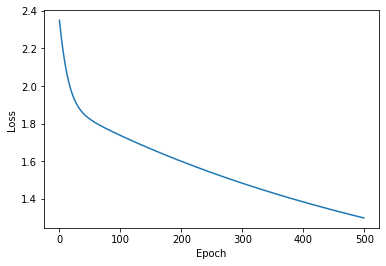

In [5]:
plt.plot(epoch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

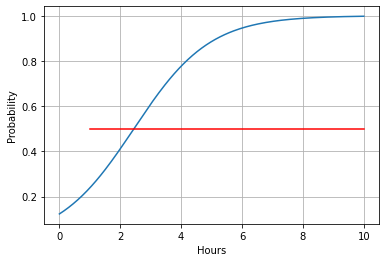

In [6]:
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([1, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.grid()
plt.show()